### Imports necessary for running the program

In [100]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 23:01:42 2019

@author: Ahmed
"""
from openpyxl import load_workbook
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd
from collections import Counter
'''df = pd.read_excel("MLDataSet.xlsx")
df2 = pd.read_excel("ADRs.xlsx")
df3 = pd.read_excel("DS.xlsx")
df4 = pd.read_excel("Mental.xlsx")

df5=[df, df2,  df3, df4]

result = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'''
#result.to_excel('result.xlsx')


'df = pd.read_excel("MLDataSet.xlsx")\ndf2 = pd.read_excel("ADRs.xlsx")\ndf3 = pd.read_excel("DS.xlsx")\ndf4 = pd.read_excel("Mental.xlsx")\n\ndf5=[df, df2,  df3, df4]\n\nresult = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'

In [4]:
def removeColumns(result):
    del result['Pain']
    del result['Content']
    del result['Filtered']
    del result['Stemmed']
    del result['big1']
    del result['big2']
    del result['small1']
    del result['small2']
    del result['Height']
    del result['Joined']
    del result['Posted']
    

In [5]:
def vectorizeCount(result):
    for i in range(len(result)):
        if result[i]==0:
            result[i]=0
        if result[i]>0 and result[i]<=3:
            result[i]=1
        if result[i]>3:
            result[i]=2
    return result
    '''if result.at[i,'MentalCount']==0:
        result.at[i,'MentalCount']=0
    if result.at[i,'MentalCount']>0 and result.at[i,'MentalCount']<=3:
        result.at[i,'MentalCount']=1
    if result.at[i,'MentalCount']>3:
        result.at[i,'MentalCount']=2


    if result.at[i,'DieaseCount']==0:
        result.at[i,'DieaseCount']=0
    if result.at[i,'DieaseCount']>0 and result.at[i,'DieaseCount']<=3:
        result.at[i,'DieaseCount']=1
    if result.at[i,'DieaseCount']>3:
        result.at[i,'DieaseCount']=2'''

### manipulating data to prepare for classification

In [6]:
def manipulate(result,labelfile,label):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    result['Gender']=imp_mean.fit_transform(result['Gender'].values.reshape(-1, 1))
    for i in range(len(result)):
        if result.at[i,'Gender']=='Male':
            result.at[i,'Gender']=0
        if result.at[i,'Gender']=='Female':
            result.at[i,'Gender']=1
    result['Drug']=LabelEncoder().fit_transform(result['Drug'])
    if 'Unnamed: 0' in result:
        del result['Unnamed: 0'] 
    result['DrugFamily']=LabelEncoder().fit_transform(result['DrugFamily'])
    labels=labelfile.iloc[:][label]
    
    #removeColumns(result)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
    result['Age']=imp_mean.fit_transform(result['Age'].values.reshape(-1, 1))
    if 'Height' in result:
        result['Height']=imp_mean.fit_transform(result['Height'].values.reshape(-1, 1))
    return result,labels

In [7]:

#asklabel=pd.read_excel('asklabels.xlsx')
#labels=asklabel.iloc[:]['MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME']

### Datasets

In [8]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDataset(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')

    resultlabel=pd.read_excel('resultlabels.xlsx')
    weightedlabel=pd.read_excel('Weightedlabels.xlsx')
    bloodlabel=pd.read_excel('bloodlabels.xlsx')
    asklabel=pd.read_excel('asklabels.xlsx')

    result,result_labels=manipulate(result,resultlabel,label)
    weighted,weighted_labels=manipulate(weighted,weightedlabel,label)
    blood,blood_labels=manipulate(blood,bloodlabel,label)
    ask,ask_labels=manipulate(ask,asklabel,asklab)
    if 'Count' in label:
        result_labels = vectorizeCount(result_labels)
        weighted_labels = vectorizeCount(weighted_labels)
        blood_labels=vectorizeCount(blood_labels)
    if 'Count' in asklab:
        ask_labels = vectorizeCount(ask_labels)
    del result['weights2']
    del result['Height']
    
    
    #Applying SMOTENC
    result,result_labels=sm.fit_resample(result,result_labels)
    weighted,weighted_labels=sm.fit_resample(weighted,weighted_labels)
    blood,blood_labels=sm.fit_resample(blood,blood_labels)
    ask,ask_labels=sm.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [9]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDatasetNoSmote(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')

    resultlabel=pd.read_excel('resultlabels.xlsx')
    weightedlabel=pd.read_excel('Weightedlabels.xlsx')
    bloodlabel=pd.read_excel('bloodlabels.xlsx')
    asklabel=pd.read_excel('asklabels.xlsx')

    result,result_labels=manipulate(result,resultlabel,label)
    weighted,weighted_labels=manipulate(weighted,weightedlabel,label)
    blood,blood_labels=manipulate(blood,bloodlabel,label)
    ask,ask_labels=manipulate(ask,asklabel,asklab)
    if 'Count' in label:
        result_labels = vectorizeCount(result_labels)
        weighted_labels = vectorizeCount(weighted_labels)
        blood_labels=vectorizeCount(blood_labels)
    if 'Count' in asklab:
        ask_labels = vectorizeCount(ask_labels)
    del result['weights2']
    del result['Height']
    
    
    #Applying SMOTENC
    #result,result_labels=sm.fit_resample(result,result_labels)
    #weighted,weighted_labels=sm.fit_resample(weighted,weighted_labels)
    #blood,blood_labels=sm.fit_resample(blood,blood_labels)
    #ask,ask_labels=sm.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [10]:
'''for i in weighted:
    if i not in result:
        if i != 'weights2':
            del weighted[i]
weighted.to_excel('Weighted.xlsx')'''

"for i in weighted:\n    if i not in result:\n        if i != 'weights2':\n            del weighted[i]\nweighted.to_excel('Weighted.xlsx')"

In [11]:
#ask_labels

In [12]:
'''for i in weighted:
    print (weighted[i])'''

'for i in weighted:\n    print (weighted[i])'

In [13]:
def get_score(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#cross_val_score(RandomForestClassifier(n_estimators=1000),result,result_labels,cv=10)

In [15]:
#This was used for some other no longer existing purposes
def getMissingPercentage(feature):
    #nancount = int(result[result[feature].isnull()][feature].shape[0])
    nancount = int(result[result[feature]==1][feature].shape[0])
    size=int(result.shape[0])
    print (nancount)
    print ((nancount*100)/size)
#getMissingPercentage('Pvc')

In [16]:
def importance(result,result_labels):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    X_train, X_test, Y_train, Y_test = pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(Y_train),pd.DataFrame(Y_test),
    #print(Counter(result_labels))
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
    sel.fit(X_train, Y_train)
    #print(sel.get_support())
    selected_feat= X_train.columns[(sel.get_support())]
    #print(len(selected_feat))
    #print(selected_feat)


    return selected_feat

In [12]:
'''from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)

scores_rf=[]

for train_index, test_index in kf.split(result):
    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'''

'from sklearn.model_selection import KFold\nfrom sklearn.ensemble import RandomForestClassifier\nkf = KFold(n_splits=10)\n\nscores_rf=[]\n\nfor train_index, test_index in kf.split(result):\n    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]\n    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'

In [208]:
def plotResult(name,max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    width = 0.2

    acc_m = (max_res['Accuracy'][x1],max_wei['Accuracy'][x2],max_bld['Accuracy'][x3],max_ask['Accuracy'][x4])
    pre_m = (max_res['Precision'][x1],max_wei['Precision'][x2],max_bld['Precision'][x3],max_ask['Precision'][x4])
    rec_m = (max_res['Recall'][x1],max_wei['Recall'][x2],max_bld['Recall'][x3],max_ask['Recall'][x4])
    fse_m = (max_res['FScore'][x1],max_wei['FScore'][x2],max_bld['FScore'][x3],max_ask['FScore'][x4])

    ind = np.arange(len(acc_m)) 
    old_ind =  ind
    rects1 = ax.bar(ind,acc_m, width=width ,label='accuracy')
    ind = ind + width
    rects2 = ax.bar(ind,pre_m, width=width,label='Precision')
    ind = ind + width
    rects3 = ax.bar(ind,rec_m, width=width,label='recall')
    ind = ind + width
    rects4 = ax.bar(ind,fse_m, width=width ,label='fscore')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(name)
    ax.set_xticks(old_ind+ width *2)
    ax.set_xticklabels(('complete', 'weighted', 'pressure', 'ask'))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,box.width, box.height * 0.6])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True,shadow=True, ncol=4)
    fig.tight_layout()
    plt.show()

### Random Forest Classifier Function 

In [17]:
def randomForest(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = RandomForestClassifier(n_estimators=estimators,random_state=0)
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Random Forest With Smote

100
Counter({1: 870, 2: 870, 0: 870})
Counter({2: 64, 1: 64, 0: 64})
Counter({2: 259, 1: 259, 0: 259})
Counter({0: 407, 1: 407, 2: 407})
Res: Accuracy: 0.4878671775223499 # Scores: (0.4804536117790528, 0.48213078843407287, 0.47544524192981524, None)
Wei: Accuracy: 0.6206896551724138 # Scores: (0.6219715956558062, 0.6127946127946128, 0.614863456326871, None)
Bld: Accuracy: 0.7051282051282052 # Scores: (0.7058823529411765, 0.7077429046486712, 0.6916866040551658, None)
Ask: Accuracy: 0.55858310626703 # Scores: (0.5822899587407577, 0.5597134986225895, 0.5671241887710479, None)
200
Counter({1: 870, 2: 870, 0: 870})
Counter({2: 64, 1: 64, 0: 64})
Counter({2: 259, 1: 259, 0: 259})
Counter({0: 407, 1: 407, 2: 407})
Res: Accuracy: 0.4878671775223499 # Scores: (0.4822456785937274, 0.482472429865861, 0.47575294611499963, None)
Wei: Accuracy: 0.6551724137931034 # Scores: (0.6480089111668059, 0.6464646464646465, 0.6469492748562516, None)
Bld: Accuracy: 0.7008547008547008 # Scores: (0.70074074074074

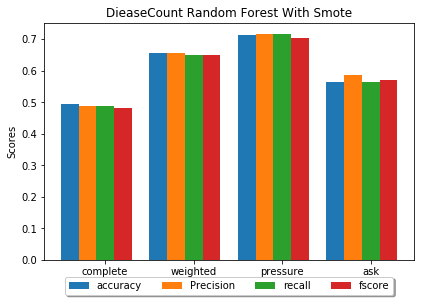

In [209]:
label='DieaseCount'
asklabel='DieaseCount'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])

for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

3

In [65]:
max_res=res_Stats.iloc[res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))].to_frame().transpose()
print(max_res)

   Estimators  Accuracy  Precision    Recall    FScore
0       100.0  0.588822   0.590017  0.588932  0.587625


In [70]:
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
stats.append(max_res)
stats.append(max_wei)
stats.append(max_bld)
stats.append(max_ask)
stats

,Estimators,Accuracy,Precision,Recall,FScore


### Random Forest With Importance Filtering 

100


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4233226837060703 # Scores: (0.4254243544084108, 0.41970504535949565, 0.4165725429775385, None)
Wei: Accuracy: 0.5681818181818182 # Scores: (0.5744047619047619, 0.5666666666666668, 0.5693486590038314, None)
Bld: Accuracy: 0.6521739130434783 # Scores: (0.6500554665351904, 0.6495419274908711, 0.6495089131684876, None)
Ask: Accuracy: 0.5472972972972973 # Scores: (0.5594198614869812, 0.5474634681250213, 0.5440526042638976, None)
200


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4233226837060703 # Scores: (0.4254243544084108, 0.41970504535949565, 0.4165725429775385, None)
Wei: Accuracy: 0.5681818181818182 # Scores: (0.5744047619047619, 0.5666666666666668, 0.5693486590038314, None)
Bld: Accuracy: 0.6280193236714976 # Scores: (0.6259615384615383, 0.6254890453834117, 0.6249509803921569, None)
Ask: Accuracy: 0.5405405405405406 # Scores: (0.5542164453159217, 0.5406762741374438, 0.538658107979642, None)
300


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4217252396166134 # Scores: (0.42520342073822553, 0.41759933371908886, 0.4148454283214847, None)
Wei: Accuracy: 0.5454545454545454 # Scores: (0.5566688213747037, 0.5444444444444444, 0.5479103766089306, None)
Bld: Accuracy: 0.6231884057971014 # Scores: (0.6205336336001914, 0.6202807120500783, 0.6195964901915499, None)
Ask: Accuracy: 0.545045045045045 # Scores: (0.5573973645402217, 0.5451958944288763, 0.541676147999818, None)
400


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4233226837060703 # Scores: (0.4254677964956019, 0.4193445344171692, 0.4164658408408409, None)
Wei: Accuracy: 0.5681818181818182 # Scores: (0.5744047619047619, 0.5666666666666668, 0.5693486590038314, None)
Bld: Accuracy: 0.6328502415458938 # Scores: (0.6308896257894436, 0.6296051773604591, 0.6289324618736384, None)
Ask: Accuracy: 0.545045045045045 # Scores: (0.5573973645402217, 0.5451958944288763, 0.541676147999818, None)
500


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.42012779552715657 # Scores: (0.42147919978802334, 0.416214643963335, 0.4129410160741753, None)
Wei: Accuracy: 0.5681818181818182 # Scores: (0.5744047619047619, 0.5666666666666668, 0.5693486590038314, None)
Bld: Accuracy: 0.6280193236714976 # Scores: (0.625979052823315, 0.6249755477308295, 0.6244627993341016, None)
Ask: Accuracy: 0.5405405405405406 # Scores: (0.5542164453159217, 0.5406762741374438, 0.538658107979642, None)
600


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4217252396166134 # Scores: (0.4251337576419488, 0.4179598446614154, 0.4149828594474692, None)
Wei: Accuracy: 0.5681818181818182 # Scores: (0.5744047619047619, 0.5666666666666668, 0.5693486590038314, None)
Bld: Accuracy: 0.6328502415458938 # Scores: (0.6308250414593698, 0.6296703834115807, 0.6292475578848946, None)
Ask: Accuracy: 0.5518018018018018 # Scores: (0.5644244840288641, 0.5518921880379216, 0.5494373119566718, None)
700


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4217252396166134 # Scores: (0.4251337576419488, 0.4179598446614154, 0.4149828594474692, None)
Wei: Accuracy: 0.5454545454545454 # Scores: (0.5509615384615385, 0.5444444444444444, 0.546031746031746, None)
Bld: Accuracy: 0.6328502415458938 # Scores: (0.6308250414593698, 0.6296703834115807, 0.6292475578848946, None)
Ask: Accuracy: 0.5518018018018018 # Scores: (0.5644244840288641, 0.5518921880379216, 0.5494373119566718, None)
800


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4217252396166134 # Scores: (0.4251337576419488, 0.4179598446614154, 0.4149828594474692, None)
Wei: Accuracy: 0.5454545454545454 # Scores: (0.5509615384615385, 0.5444444444444444, 0.546031746031746, None)
Bld: Accuracy: 0.6376811594202898 # Scores: (0.6357089412644968, 0.6343000130412103, 0.6337296658977015, None)
Ask: Accuracy: 0.5518018018018018 # Scores: (0.5644244840288641, 0.5518921880379216, 0.5494373119566718, None)
900


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 695, 1: 695, 2: 695})
Counter({0: 48, 1: 48, 2: 48})
Counter({1: 229, 0: 229, 2: 229})
Counter({0: 493, 2: 493, 1: 493})
Res: Accuracy: 0.4217252396166134 # Scores: (0.4251337576419488, 0.4179598446614154, 0.4149828594474692, None)
Wei: Accuracy: 0.5454545454545454 # Scores: (0.5509615384615385, 0.5444444444444444, 0.546031746031746, None)
Bld: Accuracy: 0.6328502415458938 # Scores: (0.6302225531562836, 0.6296703834115807, 0.6291649440541563, None)
Ask: Accuracy: 0.5518018018018018 # Scores: (0.5644244840288641, 0.5518921880379216, 0.5494373119566718, None)


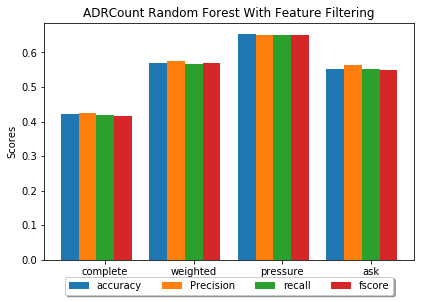

In [210]:
label='ADRCount'
asklabel='ADRCount'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Feature Filtering",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsImportanceTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsImportanceTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()


### Random Forest Without Smote

100
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})
Counter({1: 259, 2: 155, 0: 47})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5192307692307693 # Scores: (0.4097560975609756, 0.3782319375539715, 0.3771106432061655, None)
Wei: Accuracy: 0.5128205128205128 # Scores: (0.35326086956521735, 0.3737373737373737, 0.35087719298245607, None)
Bld: Accuracy: 0.49640287769784175 # Scores: (0.5344444444444444, 0.3846153846153846, 0.3959948320413436, None)
Ask: Accuracy: 0.5154185022026432 # Scores: (0.3433438155136268, 0.3581841138659321, 0.3503553674869562, None)
200
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})
Counter({1: 259, 2: 155, 0: 47})

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5149572649572649 # Scores: (0.4117171701261733, 0.3768035413887332, 0.376127645864488, None)
Wei: Accuracy: 0.5641025641025641 # Scores: (0.38095238095238093, 0.404040404040404, 0.38518518518518513, None)
Bld: Accuracy: 0.4892086330935252 # Scores: (0.5272705573457453, 0.379985754985755, 0.39202898550724646, None)
Ask: Accuracy: 0.5022026431718062 # Scores: (0.33472080420953426, 0.3492022497704316, 0.3414750957854406, None)
300
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5064102564102564 # Scores: (0.4004481967896602, 0.3696352710625681, 0.3686744222461528, None)
Wei: Accuracy: 0.5641025641025641 # Scores: (0.38095238095238093, 0.404040404040404, 0.38518518518518513, None)
Bld: Accuracy: 0.4892086330935252 # Scores: (0.47513513513513517, 0.35897435897435903, 0.35588494193145354, None)
Ask: Accuracy: 0.5286343612334802 # Scores: (0.3496986741663319, 0.363578971533517, 0.35632565999058147, None)
400
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5128205128205128 # Scores: (0.41329570788062625, 0.37447253905773087, 0.3738212617239865, None)
Wei: Accuracy: 0.6153846153846154 # Scores: (0.41534391534391535, 0.4414141414141414, 0.42037037037037034, None)
Bld: Accuracy: 0.48201438848920863 # Scores: (0.46996278575225947, 0.35434472934472944, 0.35197050597508267, None)
Ask: Accuracy: 0.5066079295154186 # Scores: (0.3348290598290598, 0.3483700642791552, 0.341356795042054, None)
500
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5149572649572649 # Scores: (0.41622574955908287, 0.3778814108876553, 0.37737527211410393, None)
Wei: Accuracy: 0.5897435897435898 # Scores: (0.40196078431372556, 0.4262626262626263, 0.40332640332640324, None)
Bld: Accuracy: 0.4892086330935252 # Scores: (0.47513513513513517, 0.35897435897435903, 0.35588494193145354, None)
Ask: Accuracy: 0.5022026431718062 # Scores: (0.3319515306122449, 0.3456152433425161, 0.33861908113553874, None)
600
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5128205128205128 # Scores: (0.4147446610453363, 0.37662827805557514, 0.37614128729012714, None)
Wei: Accuracy: 0.5897435897435898 # Scores: (0.40196078431372556, 0.4262626262626263, 0.40332640332640324, None)
Bld: Accuracy: 0.49640287769784175 # Scores: (0.4821017189438242, 0.36514719848053184, 0.36311551826425975, None)
Ask: Accuracy: 0.5154185022026432 # Scores: (0.34013660104459625, 0.3538797061524334, 0.34669935455275774, None)
700
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5085470085470085 # Scores: (0.41108799738525975, 0.3730441428924926, 0.37254028957481133, None)
Wei: Accuracy: 0.5897435897435898 # Scores: (0.40196078431372556, 0.4262626262626263, 0.40332640332640324, None)
Bld: Accuracy: 0.4892086330935252 # Scores: (0.47513513513513517, 0.35897435897435903, 0.35588494193145354, None)
Ask: Accuracy: 0.5022026431718062 # Scores: (0.3319515306122449, 0.3456152433425161, 0.33861908113553874, None)
800
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5106837606837606 # Scores: (0.4102693602693603, 0.3710636672278064, 0.37018416634105517, None)
Wei: Accuracy: 0.6153846153846154 # Scores: (0.41534391534391535, 0.4414141414141414, 0.42037037037037034, None)
Bld: Accuracy: 0.4892086330935252 # Scores: (0.47513513513513517, 0.35897435897435903, 0.35588494193145354, None)
Ask: Accuracy: 0.5110132158590308 # Scores: (0.3385185185185185, 0.3525596877869605, 0.345396458178413, None)
900
Counter({1: 870, 2: 489, 0: 198})
Counter({2: 64, 1: 58, 0: 8})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 259, 2: 155, 0: 47})
Counter({1: 407, 0: 324, 2: 25})
Res: Accuracy: 0.5106837606837606 # Scores: (0.4110485435455447, 0.3721415367267285, 0.3714055802106116, None)
Wei: Accuracy: 0.5641025641025641 # Scores: (0.3885869565217391, 0.41111111111111115, 0.3859649122807018, None)
Bld: Accuracy: 0.4892086330935252 # Scores: (0.47513513513513517, 0.35897435897435903, 0.35588494193145354, None)
Ask: Accuracy: 0.4977973568281938 # Scores: (0.3298481848184818, 0.34357782369146, 0.3365661067778191, None)


KeyError: 0

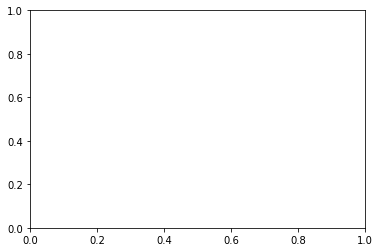

In [193]:
label='DieaseCount'
asklabel='DieaseCount'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''

x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest Without Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)


import os.path
if not os.path.exists('Forrest_StatsSmotelessTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsSmotelessTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsSmotelessTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsSmotelessTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()


### Random Forest With Importance Filtering and Without Smote

In [137]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)

'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''

x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Feature Filtering and Without Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)


import os.path
if not os.path.exists('Forrest_StatsSmotelessImportanceTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsSmotelessImportanceTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsSmotelessImportanceTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsSmotelessImportanceTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()


100


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5769230769230769 # Scores: (0.5817307692307692, 0.5726973684210527, 0.5628396739130436, None)
Wei: Accuracy: 0.7435897435897436 # Scores: (0.6777777777777778, 0.6558441558441558, 0.6637931034482759, None)
Bld: Accuracy: 0.7050359712230215 # Scores: (0.6763591800356505, 0.6812042124542124, 0.6784041532644884, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
200


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5790598290598291 # Scores: (0.5847805788982259, 0.5746710526315789, 0.5639923387954884, None)
Wei: Accuracy: 0.7948717948717948 # Scores: (0.7633928571428572, 0.6915584415584416, 0.711111111111111, None)
Bld: Accuracy: 0.7194244604316546 # Scores: (0.6936156208863536, 0.7020375457875458, 0.6967612015438831, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
300


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5876068376068376 # Scores: (0.5922055717590264, 0.5837719298245614, 0.5761327107628054, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.7157258064516129, 0.6737012987012987, 0.686886708296164, None)
Bld: Accuracy: 0.7194244604316546 # Scores: (0.6936156208863536, 0.7020375457875458, 0.6967612015438831, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
400


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5876068376068376 # Scores: (0.5922055717590264, 0.5837719298245614, 0.5761327107628054, None)
Wei: Accuracy: 0.7435897435897436 # Scores: (0.6777777777777778, 0.6558441558441558, 0.6637931034482759, None)
Bld: Accuracy: 0.7194244604316546 # Scores: (0.6936156208863536, 0.7020375457875458, 0.6967612015438831, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
500


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5876068376068376 # Scores: (0.5922055717590264, 0.5837719298245614, 0.5761327107628054, None)
Wei: Accuracy: 0.7435897435897436 # Scores: (0.6777777777777778, 0.6558441558441558, 0.6637931034482759, None)
Bld: Accuracy: 0.7194244604316546 # Scores: (0.6936156208863536, 0.7020375457875458, 0.6967612015438831, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
600


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5790598290598291 # Scores: (0.5847805788982259, 0.5746710526315789, 0.5639923387954884, None)
Wei: Accuracy: 0.6923076923076923 # Scores: (0.6201298701298701, 0.6201298701298701, 0.6201298701298701, None)
Bld: Accuracy: 0.7194244604316546 # Scores: (0.6936156208863536, 0.7020375457875458, 0.6967612015438831, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
700


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5790598290598291 # Scores: (0.5847805788982259, 0.5746710526315789, 0.5639923387954884, None)
Wei: Accuracy: 0.6923076923076923 # Scores: (0.6201298701298701, 0.6201298701298701, 0.6201298701298701, None)
Bld: Accuracy: 0.7266187050359713 # Scores: (0.7003757736516357, 0.7075320512820513, 0.7032584269662923, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
800


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5790598290598291 # Scores: (0.5847805788982259, 0.5746710526315789, 0.5639923387954884, None)
Wei: Accuracy: 0.6923076923076923 # Scores: (0.6201298701298701, 0.6201298701298701, 0.6201298701298701, None)
Bld: Accuracy: 0.7266187050359713 # Scores: (0.7003757736516357, 0.7075320512820513, 0.7032584269662923, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)
900


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5769230769230769 # Scores: (0.5817307692307692, 0.5726973684210527, 0.5628396739130436, None)
Wei: Accuracy: 0.6923076923076923 # Scores: (0.6201298701298701, 0.6201298701298701, 0.6201298701298701, None)
Bld: Accuracy: 0.7194244604316546 # Scores: (0.6936156208863536, 0.7020375457875458, 0.6967612015438831, None)
Ask: Accuracy: 0.8193832599118943 # Scores: (0.5018853695324283, 0.5003556187766715, 0.4733774684547049, None)


### Random Forest Classifier Function 10-Fold

In [123]:
def average(scores):
    FScore=0
    Recall=0
    Precision=0

    for i in scores:
        Precision+=i[0]
        Recall+=i[1]
        FScore+=i[2]
    return (Precision/10,Recall/10,FScore/10)

In [124]:
def randomForest10Fold(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=5)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [125]:
def randomForest10FoldNotSmote(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=5)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Random Forest with 10-Fold Cross Validation

In [133]:
label='Pain
asklabel='Pain'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest10Fold(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10Fold(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10Fold(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10Fold(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''

x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest with K-Fold Cross Validation",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)


import os.path
if not os.path.exists('Forrest_StatsFoldTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsFoldTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsFoldTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsFoldTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

SyntaxError: EOL while scanning string literal (<ipython-input-133-2e3d61ea3ba6>, line 1)

### Random Forest with 10-Fold Cross Validation Without Smote

In [ ]:
label='Pain'
asklabel='Pain'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_acc,res_scores=randomForest10FoldNotSmote(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10FoldNotSmote(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10FoldNotSmote(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10FoldNotSmote(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest with K-Fold Cross Validation Without Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)




import os.path
if not os.path.exists('Forrest_StatsFoldSmotelessTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsFoldSmotelessTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsFoldSmotelessTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsFoldSmotelessTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

In [26]:
#ask_scores[9]

### SVM Classifier Function

In [140]:
def SVM(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = SVC(gamma='auto')
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### SVM  With Smote

Counter({0: 1168, 1: 1168})
Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})
Counter({0: 590, 1: 590})
Res: Accuracy: 0.6419400855920114 # Scores: (0.643158838878017, 0.6432312486743135, 0.6419371709635997, None)
Wei: Accuracy: 0.5555555555555556 # Scores: (0.6845238095238095, 0.6367647058823529, 0.5455820476858345, None)
Bld: Accuracy: 0.7114427860696517 # Scores: (0.7503367003367003, 0.7214995034756704, 0.7053083923154702, None)
Ask: Accuracy: 0.6299435028248588 # Scores: (0.6344944363812288, 0.6336195847218662, 0.6297987498702771, None)


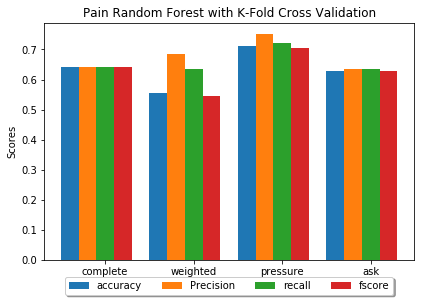

In [216]:
label='Pain'
asklabel='Pain'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'.xlsx') 

plotResult(label+" SVM With Smote",Stats,Stats,Stats,Stats,0,1,2,3)

import os.path
if not os.path.exists('SVM'+'.xlsx'):
    writer = pd.ExcelWriter('SVM'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVM'+'.xlsx', engine='openpyxl')
book = load_workbook('SVM'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

In [215]:
Stats['Accuracy'][0]


0.7457264957264957

### SVM With Importance Filtering

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 1168, 1: 1168})
Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})
Counter({0: 590, 1: 590})
Res: Accuracy: 0.6148359486447932 # Scores: (0.6136528865536499, 0.6122305797125096, 0.6120880472208559, None)
Wei: Accuracy: 0.5370370370370371 # Scores: (0.7222222222222222, 0.6323529411764706, 0.516994633273703, None)
Bld: Accuracy: 0.7064676616915423 # Scores: (0.7569086651053865, 0.7178748758689175, 0.6978213785195566, None)
Ask: Accuracy: 0.5875706214689266 # Scores: (0.5975285676322084, 0.5940784414252755, 0.5856661856661858, None)


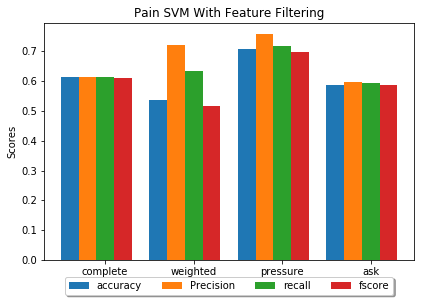

In [217]:
label='Pain'
asklabel='Pain'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'importance.xlsx')

plotResult(label+" SVM With Feature Filtering",Stats,Stats,Stats,Stats,0,1,2,3)
import os.path
if not os.path.exists('SVMImportance'+'.xlsx'):
    writer = pd.ExcelWriter('SVMImportance'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVMImportance'+'.xlsx', engine='openpyxl')
book = load_workbook('SVMImportance'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### SVM Without Smote

Counter({0: 1168, 1: 389})
Counter({0: 89, 1: 41})
Counter({0: 334, 1: 127})
Counter({0: 590, 1: 166})
Res: Accuracy: 0.7457264957264957 # Scores: (0.5398546477552455, 0.5085272873194221, 0.47188848323929633, None)
Wei: Accuracy: 0.7435897435897436 # Scores: (0.868421052631579, 0.5454545454545454, 0.5075757575757576, None)
Bld: Accuracy: 0.7482014388489209 # Scores: (0.8653846153846154, 0.6022727272727273, 0.5920335429769392, None)
Ask: Accuracy: 0.7665198237885462 # Scores: (0.38666666666666666, 0.4943181818181818, 0.4339152119700748, None)


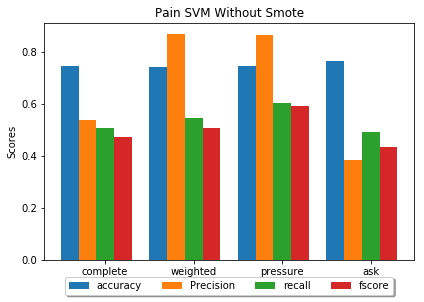

In [218]:
label='Pain'
asklabel='Pain'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'smoteless.xlsx') 

plotResult(label+" SVM Without Smote",Stats,Stats,Stats,Stats,0,1,2,3)

import os.path
if not os.path.exists('SVMSmoteless'+'.xlsx'):
    writer = pd.ExcelWriter('SVMSmoteless'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVMSmoteless'+'.xlsx', engine='openpyxl')
book = load_workbook('SVMSmoteless'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### SVM With Importance Filtering Without Smote

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5854700854700855 # Scores: (0.5913461538461537, 0.58125, 0.571671195652174, None)
Wei: Accuracy: 0.8205128205128205 # Scores: (0.9, 0.6818181818181819, 0.7111111111111111, None)
Bld: Accuracy: 0.7410071942446043 # Scores: (0.7538850038850039, 0.6496108058608059, 0.6563186813186813, None)
Ask: Accuracy: 0.8281938325991189 # Scores: (0.5442825112107623, 0.5056187766714082, 0.47717474753440026, None)


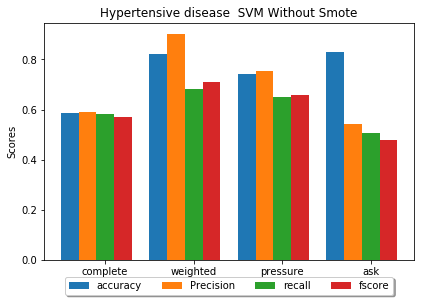

In [219]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'importancesmoteless.xlsx') 
plotResult(label+" SVM Feature Filtering Without Smote",Stats,Stats,Stats,Stats,0,1,2,3)

### SVM 10-Fold Function

In [31]:
def SVM10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        print(train_index)
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [15]:
def SVM10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)
    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### SVM 10-Fold With Smote

In [22]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM10Fold(result,result_labels,"Result")
wei_acc,wei_scores=SVM10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'.xlsx') 
plotResult(label+" SVM K-Fold with Smote",Stats,Stats,Stats,Stats,0,1,2,3)

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 608, 1: 608})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.5677837096890557 # Scores: (0.5633828949481172, 0.563862640976727, 0.5466940391909823)
Wei: Accuracy: 0.65 # Scores: (0.6825468975468976, 0.5652651515151514, 0.5653890026955043)
Bld: Accuracy: 0.7022895622895623 # Scores: (0.7061934799063543, 0.6829457746066863, 0.6610658622253598)
Ask: Accuracy: 0.5650318385042677 # Scores: (0.529848489498338, 0.48393937809896376, 0.45570929377088626)


### SVM K-Fold Without Smote

In [35]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=SVM10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'smoteless.xlsx') 
plotResult(label+" SVM K-fold Without Smote",Stats,Stats,Stats,Stats,0,1,2,3)

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 608, 1: 148})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.5452646815550042 # Scores: (0.5445212508044581, 0.537097948623489, 0.5149338922337787)
Wei: Accuracy: 0.6846153846153846 # Scores: (0.667832167832168, 0.6461111111111111, 0.5810287547513285)
Bld: Accuracy: 0.6685476410730804 # Scores: (0.7285646706812408, 0.6083607011157446, 0.5707515409817693)
Ask: Accuracy: 0.8039298245614035 # Scores: (0.40196491228070175, 0.5, 0.4449683813348536)


In [36]:
#result

### Naive Bayes Function

In [221]:
def NB(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Naive Bayes With Smote

Counter({1: 870, 2: 870, 0: 870})
Counter({2: 64, 1: 64, 0: 64})
Counter({2: 259, 1: 259, 0: 259})
Counter({0: 407, 1: 407, 2: 407})
Res: Accuracy: 0.3716475095785441 # Scores: (0.36914211314713513, 0.3696593232582051, 0.36904449455762384, None)
Wei: Accuracy: 0.5689655172413793 # Scores: (0.544067044067044, 0.553872053872054, 0.5390878278809313, None)
Bld: Accuracy: 0.5128205128205128 # Scores: (0.5133121732636297, 0.516115271389533, 0.49419065782702143, None)
Ask: Accuracy: 0.4359673024523161 # Scores: (0.4213728198299076, 0.4359228650137741, 0.4125350614328877, None)


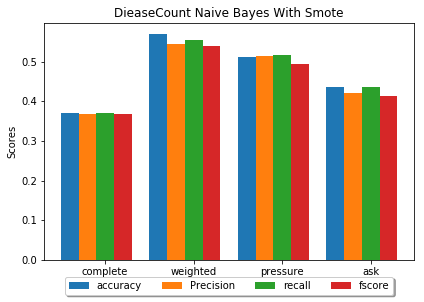

In [222]:
label='DieaseCount'
asklabel='DieaseCount'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'.xlsx')

plotResult(label+" Naive Bayes With Smote",Stats,Stats,Stats,Stats,0,1,2,3)

### Naive Bayes With importance Filtering

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 273, 0: 273})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.5209580838323353 # Scores: (0.5277491231689705, 0.5214342629482072, 0.4923154872487756, None)
Wei: Accuracy: 0.5208333333333334 # Scores: (0.5227703984819734, 0.5208333333333333, 0.5104212860310422, None)
Bld: Accuracy: 0.5792682926829268 # Scores: (0.5819148936170213, 0.5801725420199315, 0.5773669467787115, None)
Ask: Accuracy: 0.5287671232876713 # Scores: (0.5606027114647805, 0.5498484848484848, 0.5152273288855943, None)


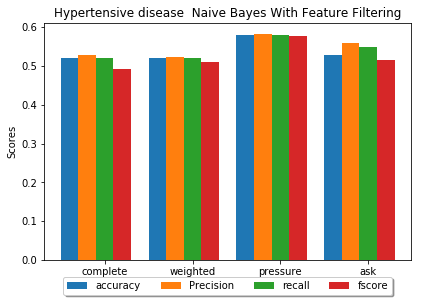

In [223]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importance.xlsx') 

plotResult(label+" Naive Bayes With Feature Filtering",Stats,Stats,Stats,Stats,0,1,2,3)

### Naive Bayes Without Smote

In [40]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'smoteless.xlsx') 
plotResult(label+" Naive Bayes Without Smote",Stats,Stats,Stats,Stats,0,1,2,3)

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5235042735042735 # Scores: (0.5223906705539358, 0.5175438596491229, 0.49288383325477775, None)
Wei: Accuracy: 0.48717948717948717 # Scores: (0.45855614973262027, 0.4496753246753247, 0.44285714285714284, None)
Bld: Accuracy: 0.6258992805755396 # Scores: (0.5817757009345794, 0.5618921308576481, 0.5564555719194895, None)
Ask: Accuracy: 0.8370044052863436 # Scores: (0.4185022026431718, 0.5, 0.4556354916067146, None)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes With importance Filtering Without Smote

In [41]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importancesmoteless.xlsx') 

plotResult(label+" Naive Bayes Feature Filtering Without Smote",Stats,Stats,Stats,Stats,0,1,2,3)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5341880341880342 # Scores: (0.5651785714285714, 0.5240131578947368, 0.4399209486166008, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.7607142857142857, 0.6185064935064934, 0.6285714285714286, None)
Bld: Accuracy: 0.60431654676259 # Scores: (0.5498805256869773, 0.5369142351900973, 0.5276490577695397, None)
Ask: Accuracy: 0.8370044052863436 # Scores: (0.4185022026431718, 0.5, 0.4556354916067146, None)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes 10-Fold Function

In [42]:
def NB10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [43]:
def NB10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Naive Bayes 10-Fold With Smote

In [44]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB10Fold(result,result_labels,"Result")
wei_acc,wei_scores=NB10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'.xlsx') 

plotResult(label+" Naive Bayes K-Fold",Stats,Stats,Stats,Stats,0,1,2,3)

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.4737536974244283 # Scores: (0.4437248384577875, 0.507883657240345, 0.41735891682385373)
Wei: Accuracy: 0.5 # Scores: (0.3613257575757576, 0.418125, 0.35507356479438856)
Bld: Accuracy: 0.5394612794612794 # Scores: (0.5596324080591916, 0.5227979015977775, 0.4277071304428234)
Ask: Accuracy: 0.35564964097005825 # Scores: (0.47280225157475275, 0.34365108057296984, 0.31389083585667554)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\A

### Naive Bayes 10-Fold Without Smote

In [45]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=NB10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'smoteless.xlsx') 


plotResult(label+" Naive Bayes K-Fold Without Smote",Stats,Stats,Stats,Stats,0,1,2,3)

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\A

Counter({0: 608, 1: 148})
Res: Accuracy: 0.4668444995864351 # Scores: (0.49049137873720994, 0.5091527088419887, 0.40025801905981184)
Wei: Accuracy: 0.5692307692307692 # Scores: (0.4187015762015762, 0.5033165445665446, 0.4272275698158052)
Bld: Accuracy: 0.5113320999074931 # Scores: (0.5821872935401781, 0.5514503039608334, 0.4721649322156651)
Ask: Accuracy: 0.7359298245614034 # Scores: (0.3679649122807017, 0.5, 0.41310931087008596)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
'''from collections import Counter
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
X_res, y_res = sm.fit_resample(result, result_labels)
print(Counter(result_labels))
print(Counter(y_res))
print(X_res)
print(y_res)
print(result_labels)'''

'from collections import Counter\nfrom imblearn.over_sampling import SMOTENC\nsm = SMOTENC(random_state=42, categorical_features=[0, 1,3])\nX_res, y_res = sm.fit_resample(result, result_labels)\nprint(Counter(result_labels))\nprint(Counter(y_res))\nprint(X_res)\nprint(y_res)\nprint(result_labels)'

In [20]:
print(result_labels.value_counts())
print(weighted_labels.value_counts())
print(blood_labels.value_counts())
print(ask_labels.value_counts())

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [48]:
print(result_labels.value_counts())
print(weighted_labels.value_counts())
print(blood_labels.value_counts())
print(ask_labels.value_counts())

0    834
1    723
Name: Hypertensive disease , dtype: int64
1    80
0    50
Name: Hypertensive disease , dtype: int64
1    274
0    188
Name: Hypertensive disease , dtype: int64
0    608
1    148
Name: Hypertensive disease , dtype: int64


In [49]:
res_scores[0]

0.49049137873720994

In [50]:
wei_acc


0.5692307692307692

In [51]:
ask_acc

0.7359298245614034

In [52]:
res_scores

(0.49049137873720994, 0.5091527088419887, 0.40025801905981184)

In [53]:
wei_scores

(0.4187015762015762, 0.5033165445665446, 0.4272275698158052)

In [54]:
ask_scores

(0.3679649122807017, 0.5, 0.41310931087008596)

In [ ]:
label='Diabetes'
asklabel='MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
print(Counter(result_labels))
print(Counter(weighted_labels))
print(Counter(blood_labels))
print(Counter(ask_labels))

In [119]:

from collections import Counter
label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
print(Counter(result_labels))
print(Counter(weighted_labels))
print(Counter(blood_labels))
print(Counter(ask_labels))

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 273, 0: 188})
Counter({0: 608, 1: 148})
